Link to original dataset is  [here](https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification). In short - The Portugese Bank wants to identify clients that have a high chance of commiting to a longer deposit 

# Exploratory Data Analysis

## Initial imports

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [247]:
data = pd.read_csv('new_train.csv')
display(data.head(), data.info(),data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


None

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [248]:
data.shape

(32950, 16)

In [249]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [250]:
data.nunique()

age              75
job              12
marital           4
education         8
default           3
housing           3
loan              3
contact           2
month            10
day_of_week       5
duration       1467
campaign         40
pdays            27
previous          8
poutcome          3
y                 2
dtype: int64

Data seems to not contain any null values

## Univariate data visualization - categorical columns -

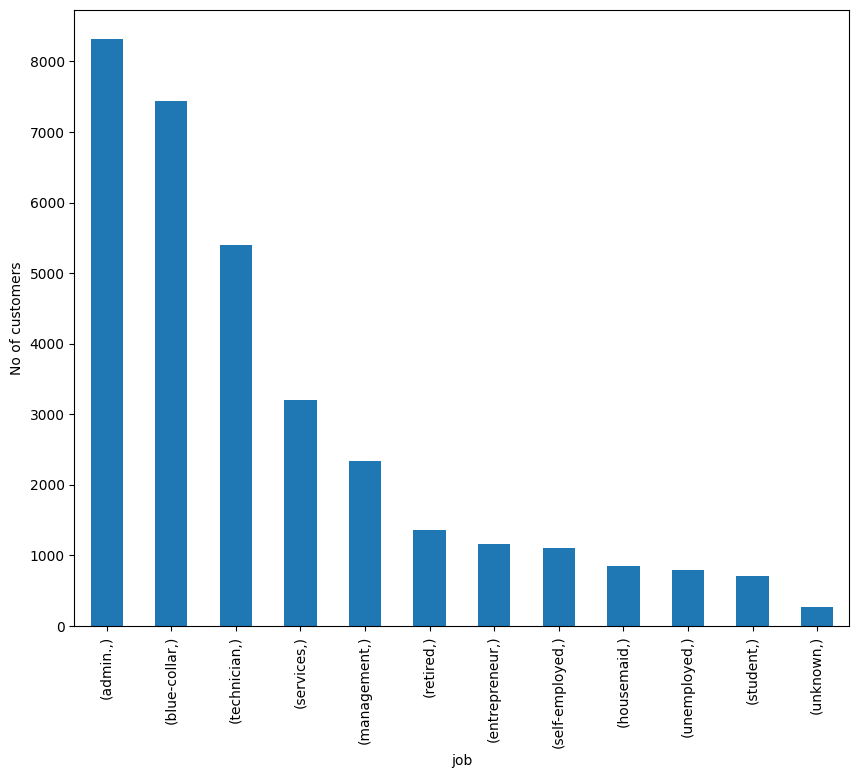

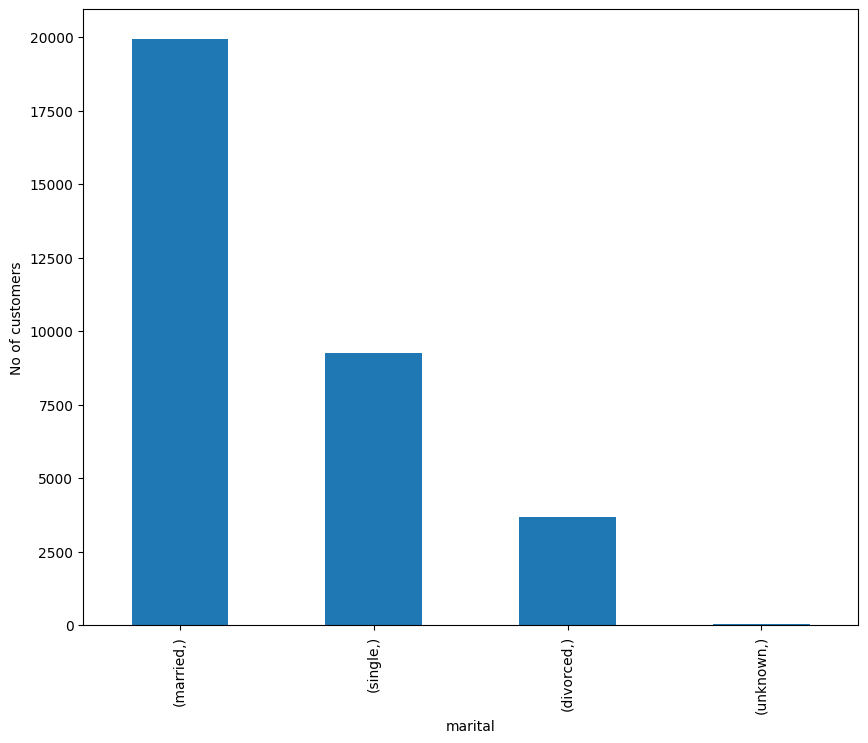

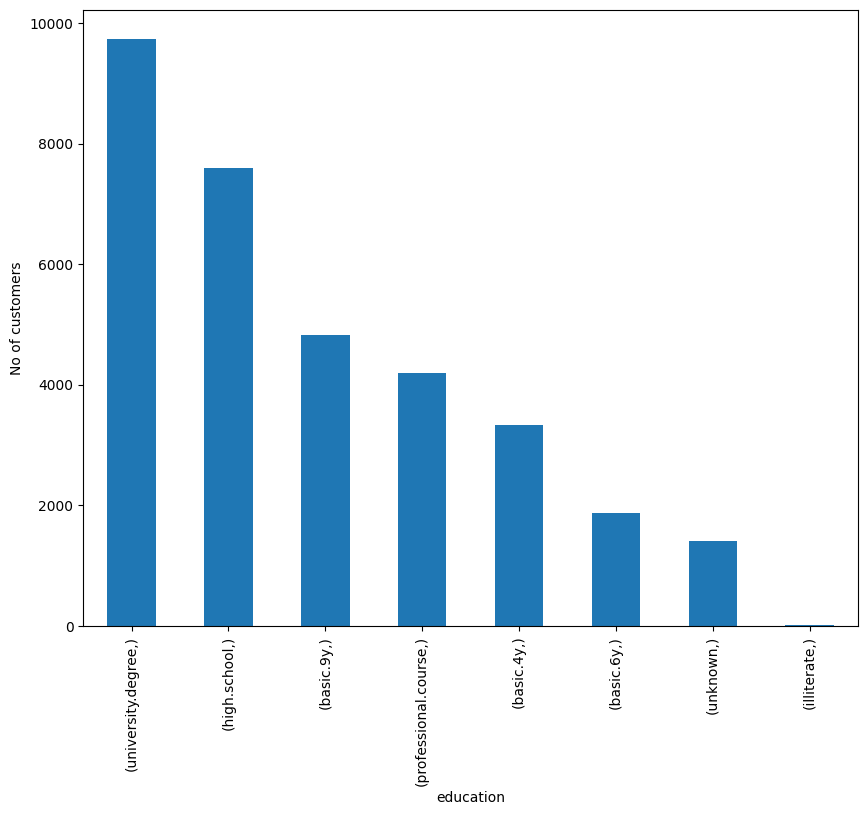

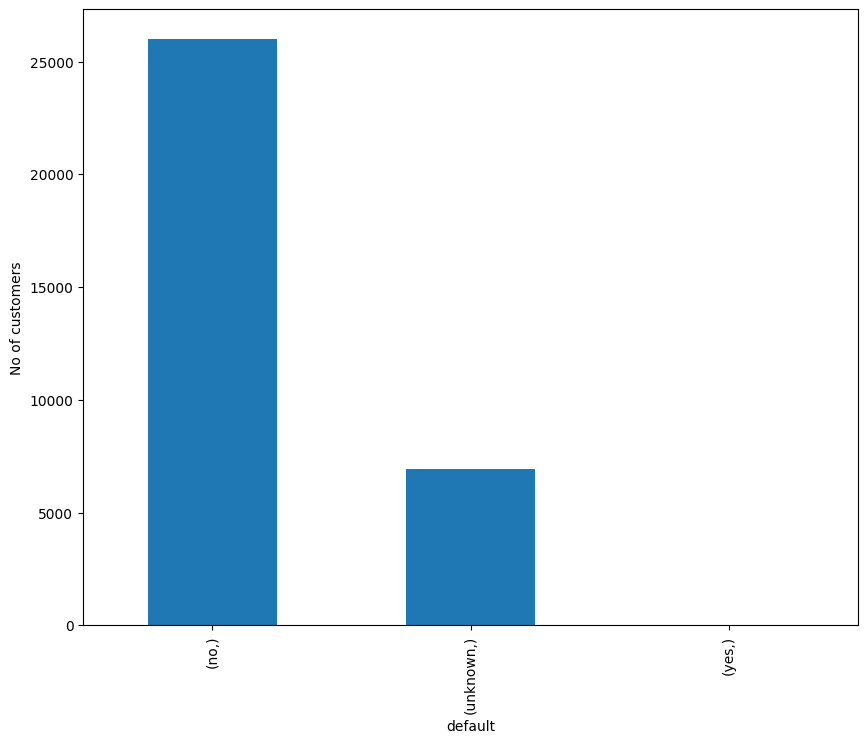

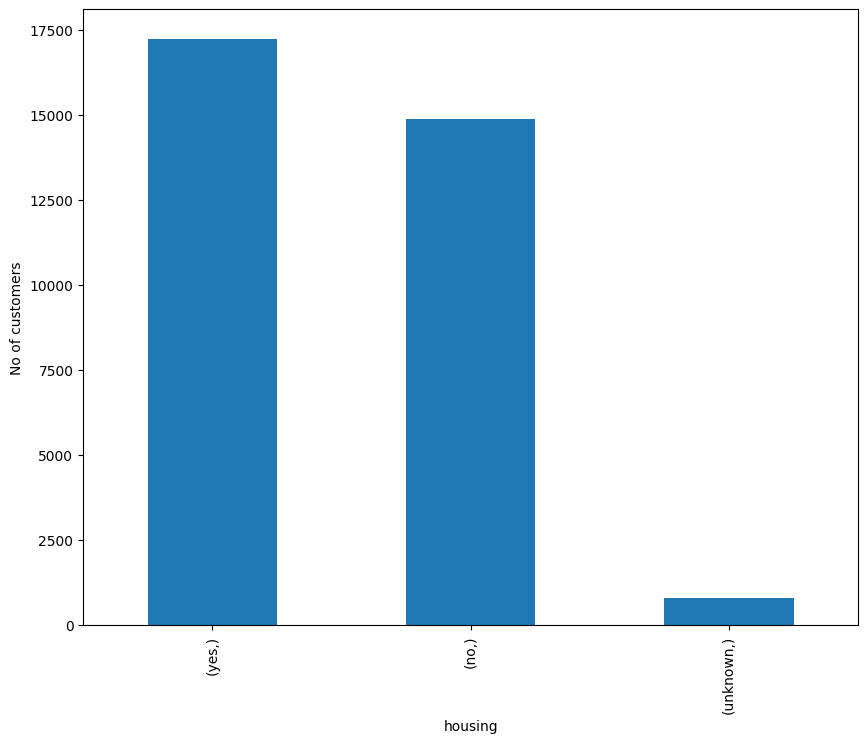

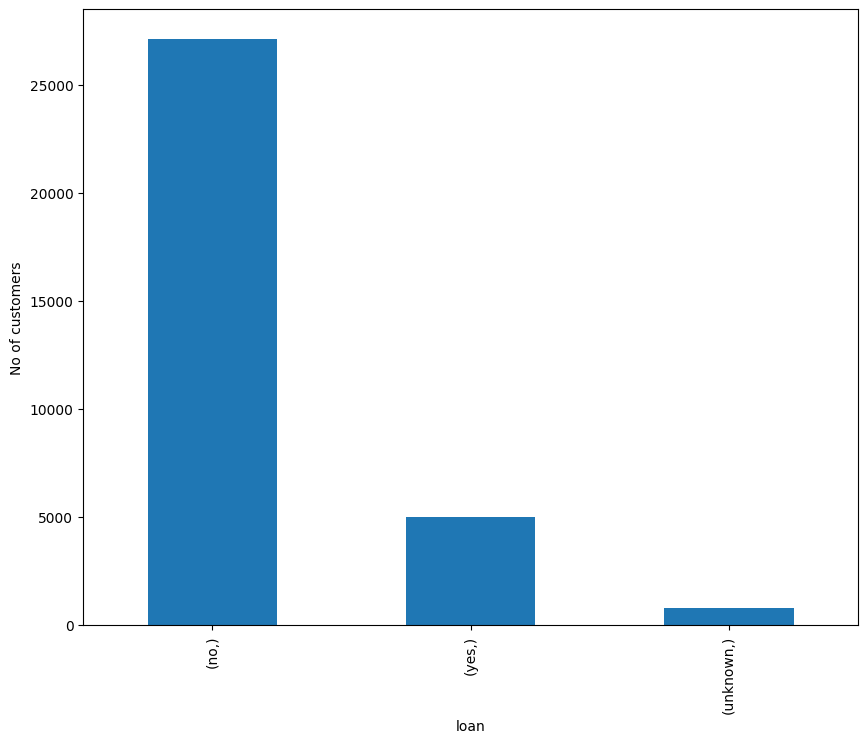

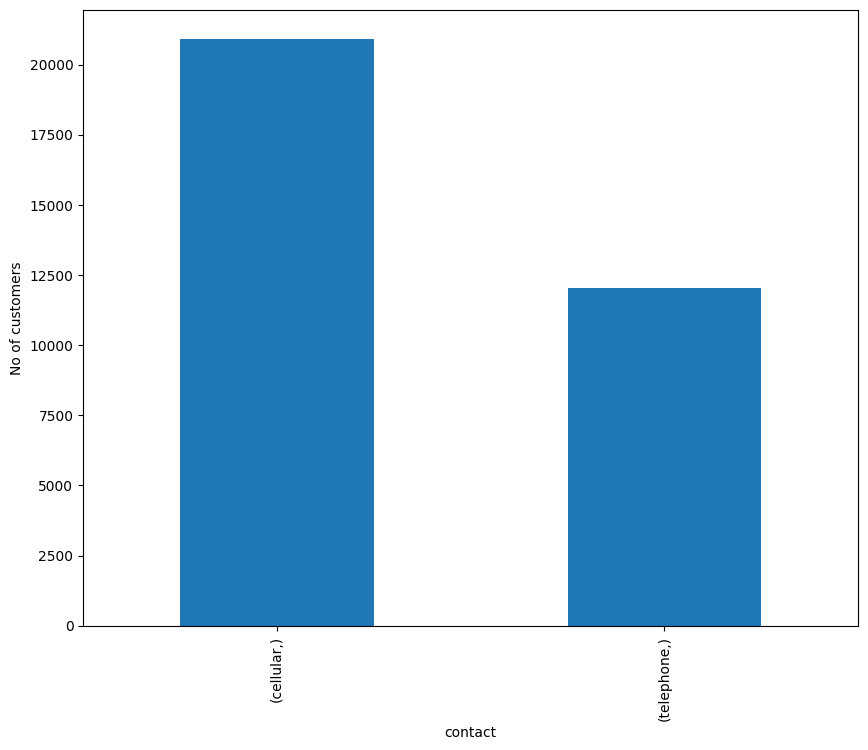

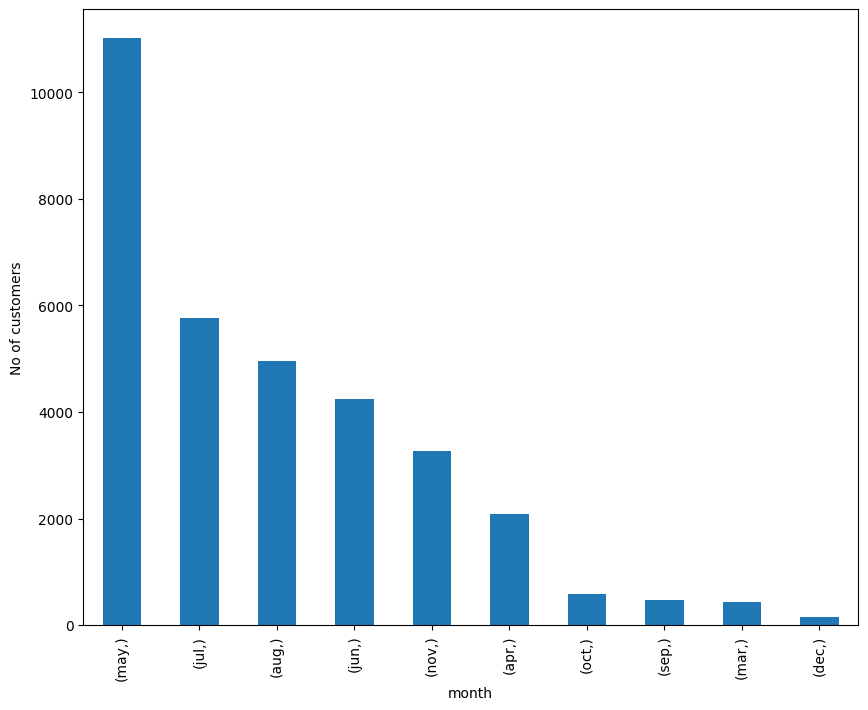

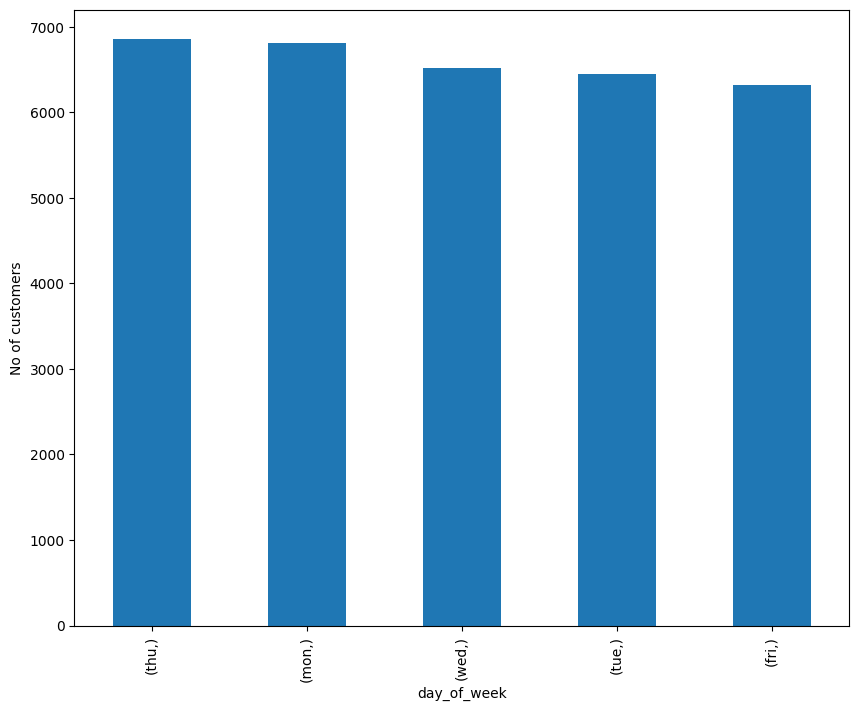

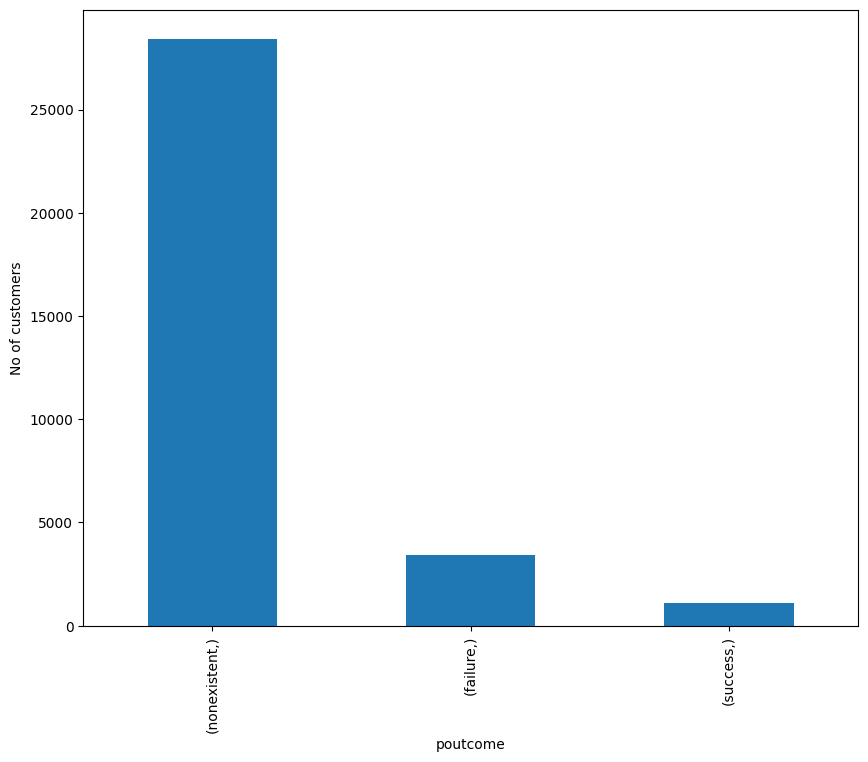

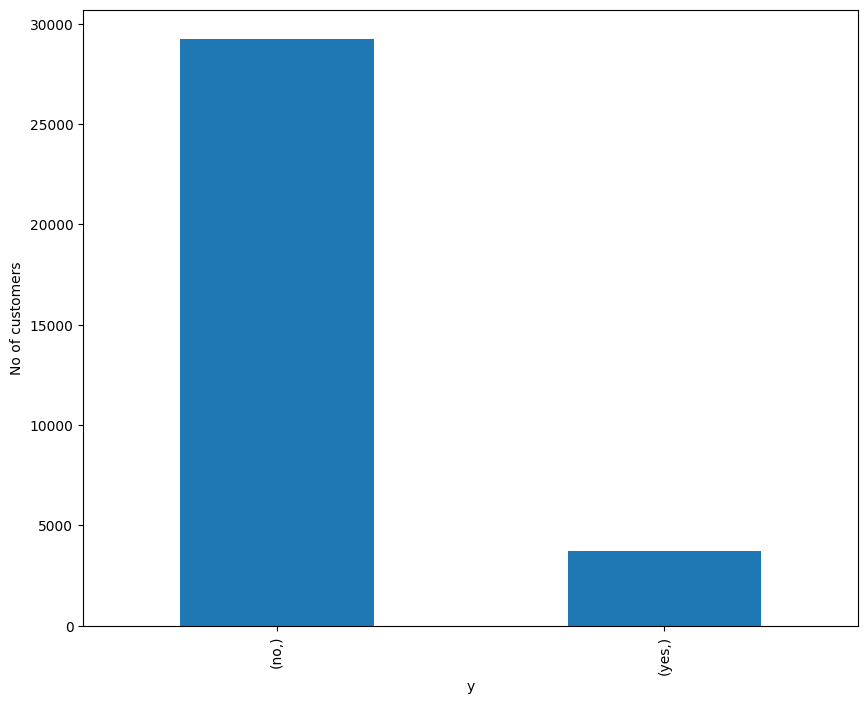

In [251]:
for col in data.select_dtypes(include=['object']).columns:
  data[[col]].value_counts().plot(kind='bar',figsize=(10,8))
  plt.xlabel(col)
  plt.ylabel("No of customers")
  plt.show()




<Axes: ylabel='None'>

0.5260091047040971

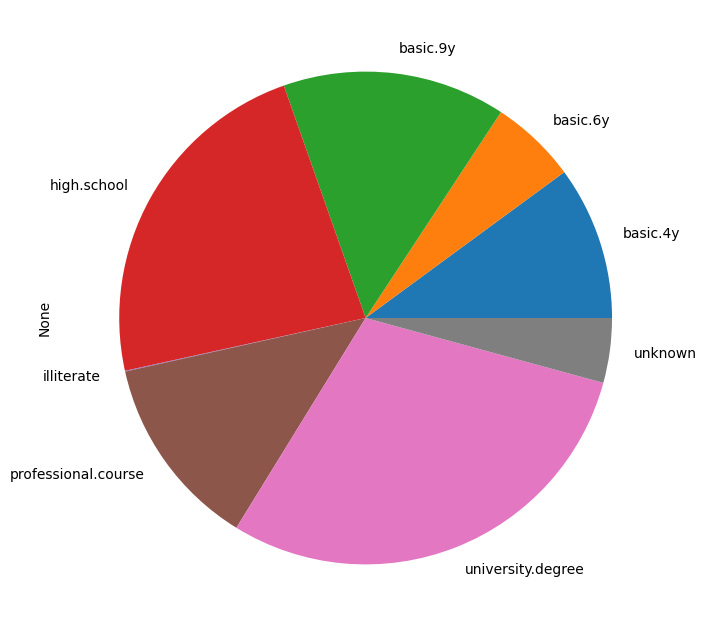

In [252]:
plot = data.groupby(['education']).size().plot.pie(figsize=(10,8))
edu_perc = (data.education.value_counts()['university.degree'] + data.education.value_counts()['high.school'] )/ data.shape[0] 
display(plot, edu_perc)



*   majority of customers are married
*   half of customers have obtained a high school diploma or university degree
*   a third of customers were last contacted in may 
*   majority of customers don't have a credit in default or a personal loan
*   ratio of having a house loan is almost 50:50



## Bivariate data visualization - categorical columns

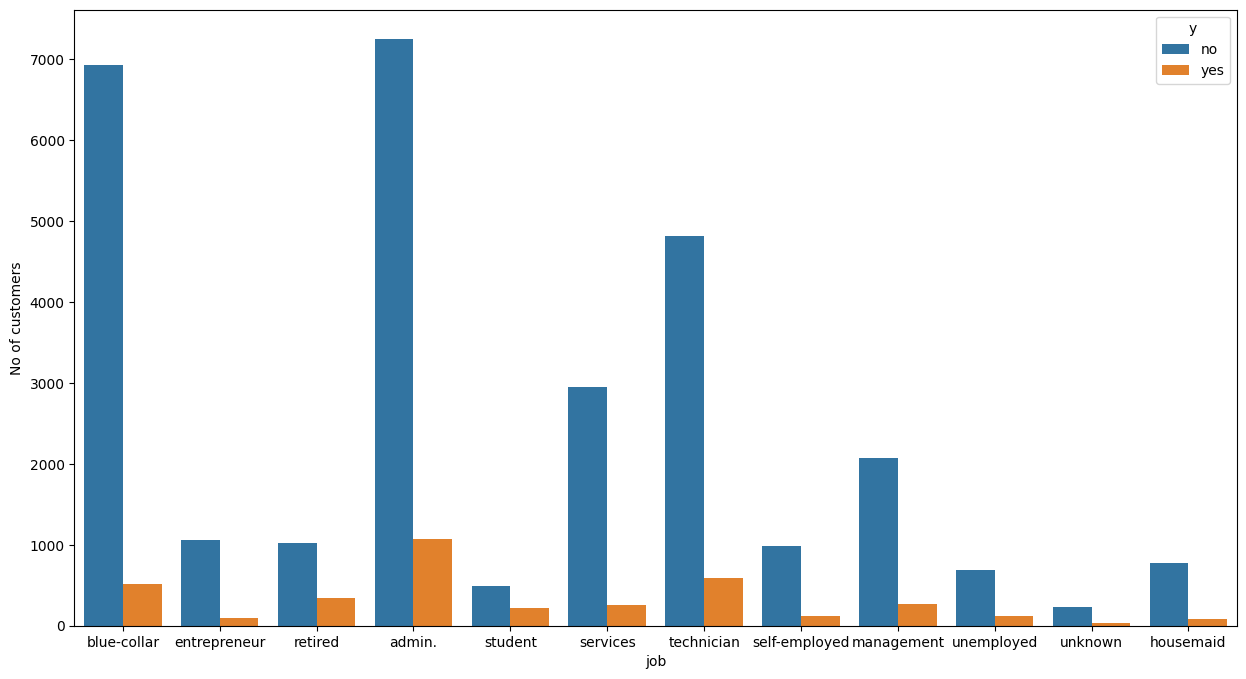

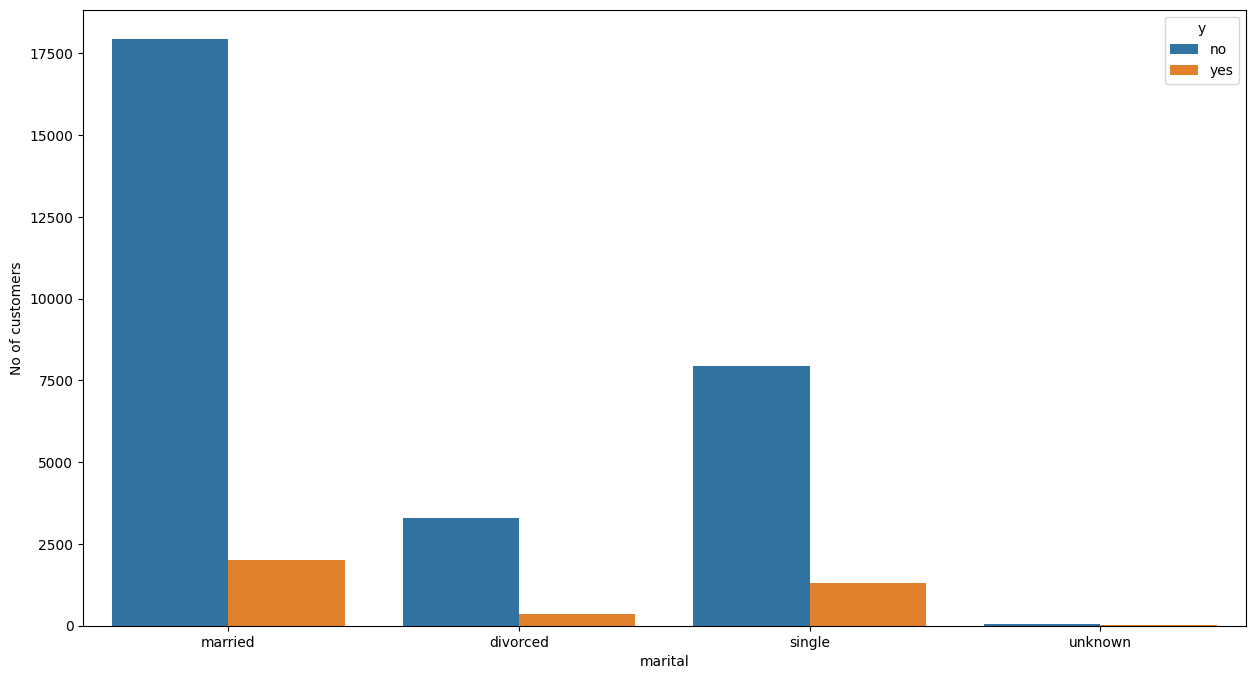

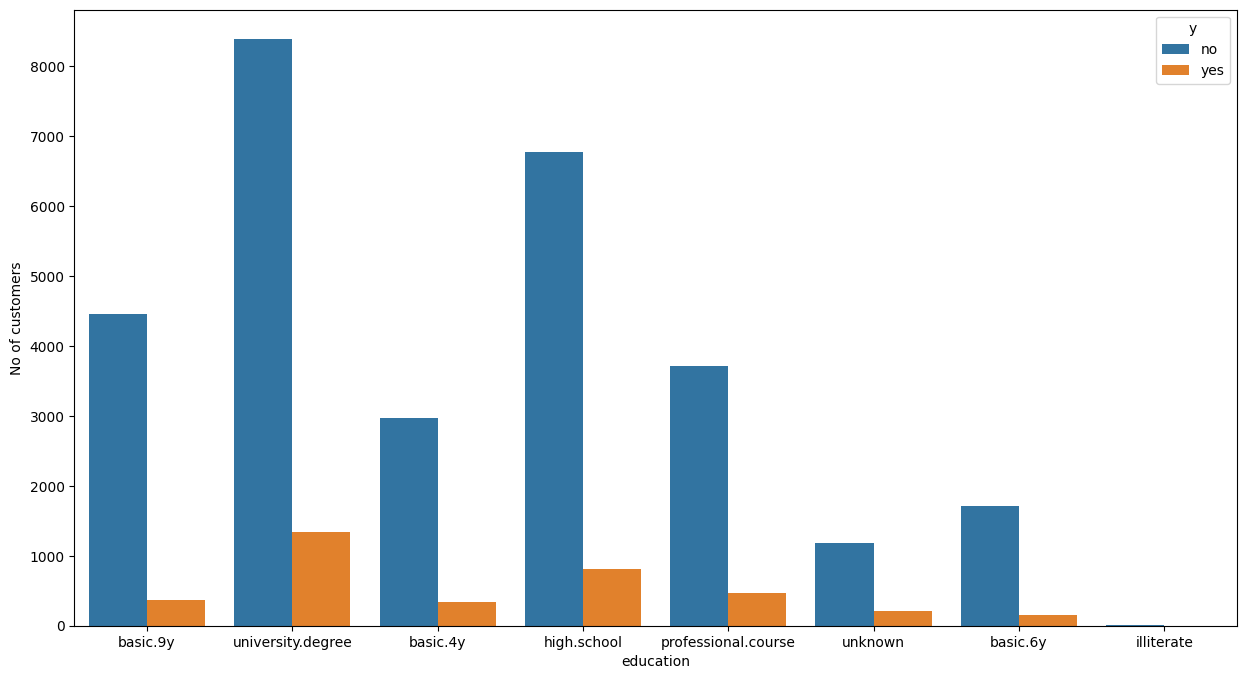

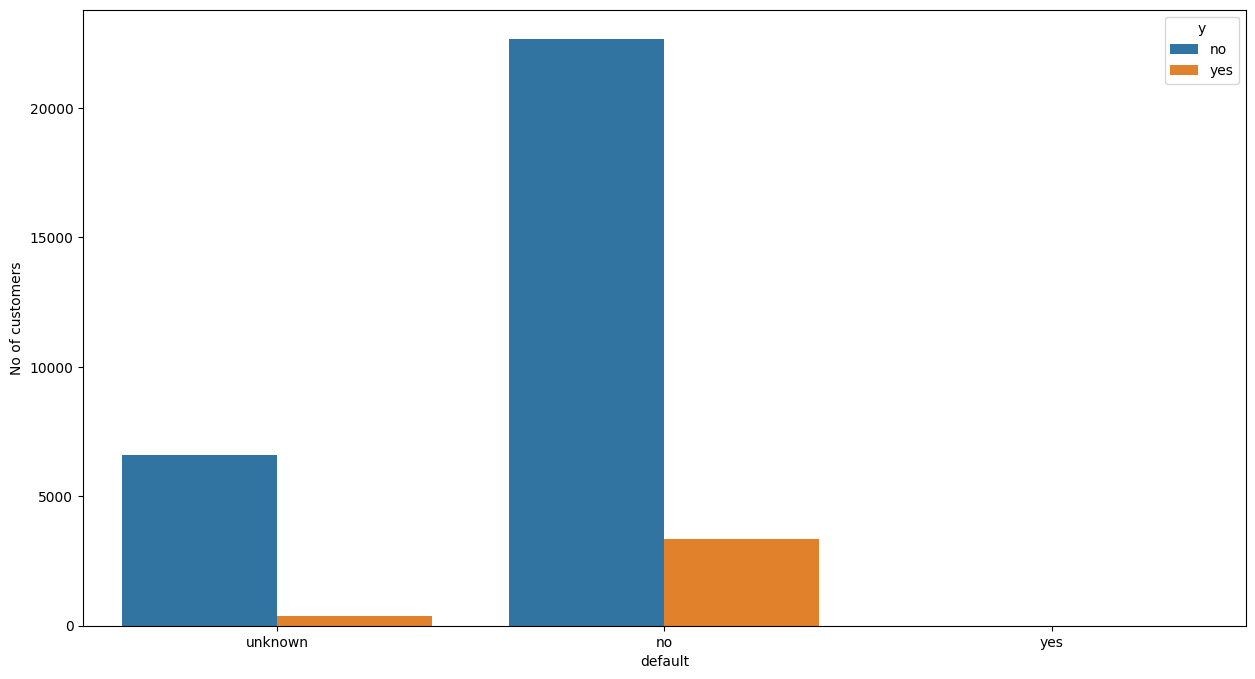

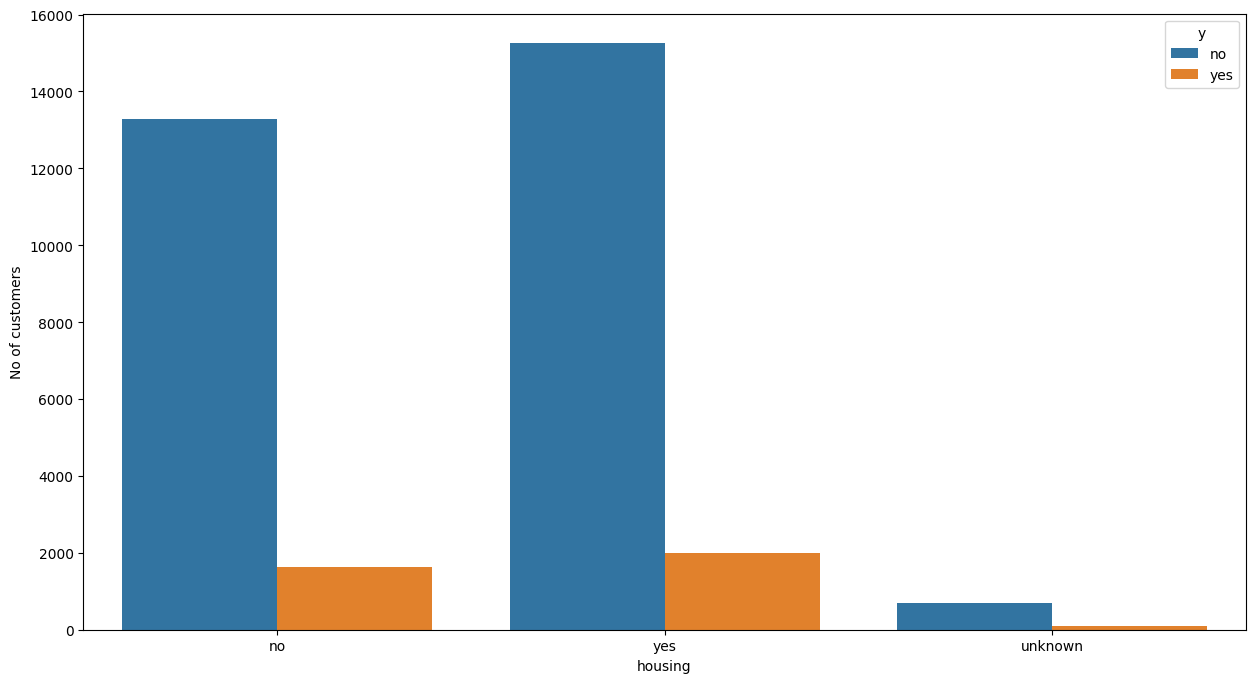

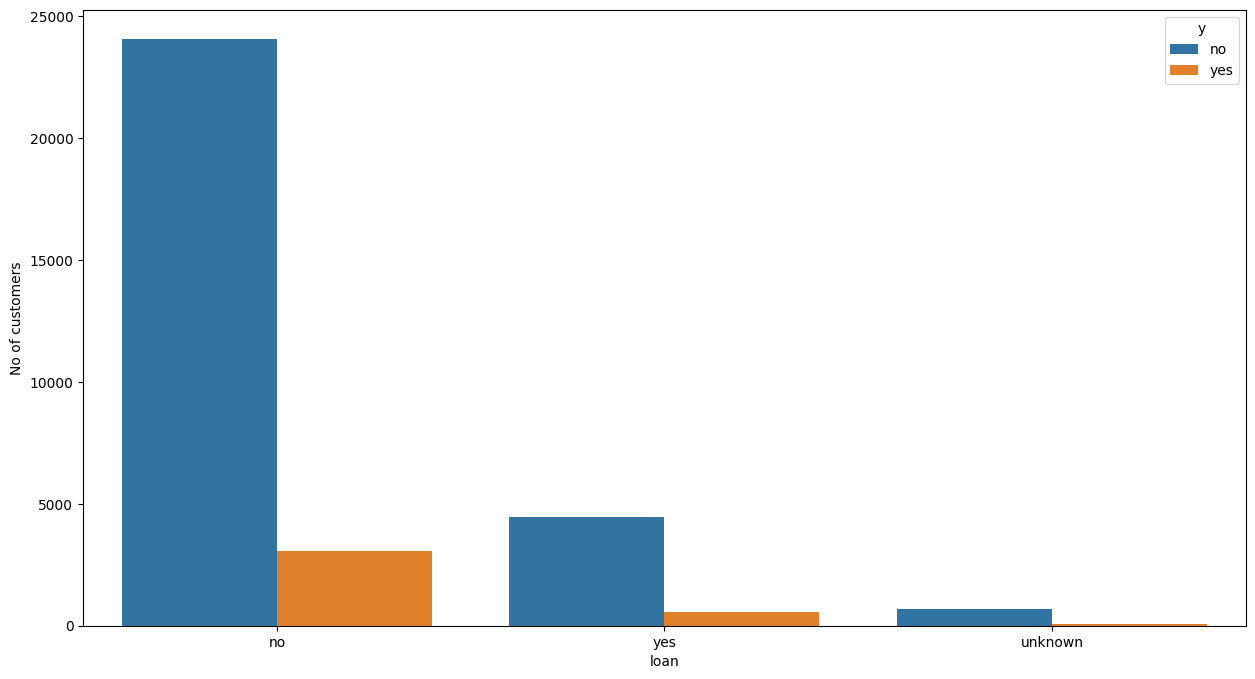

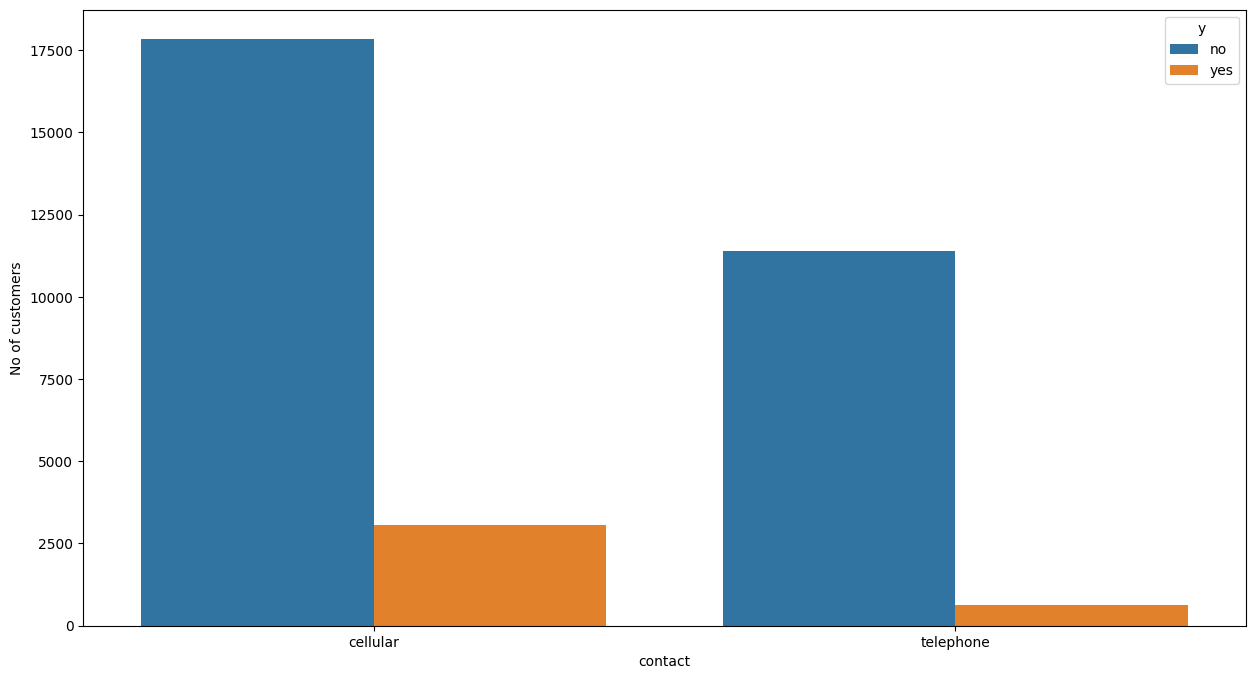

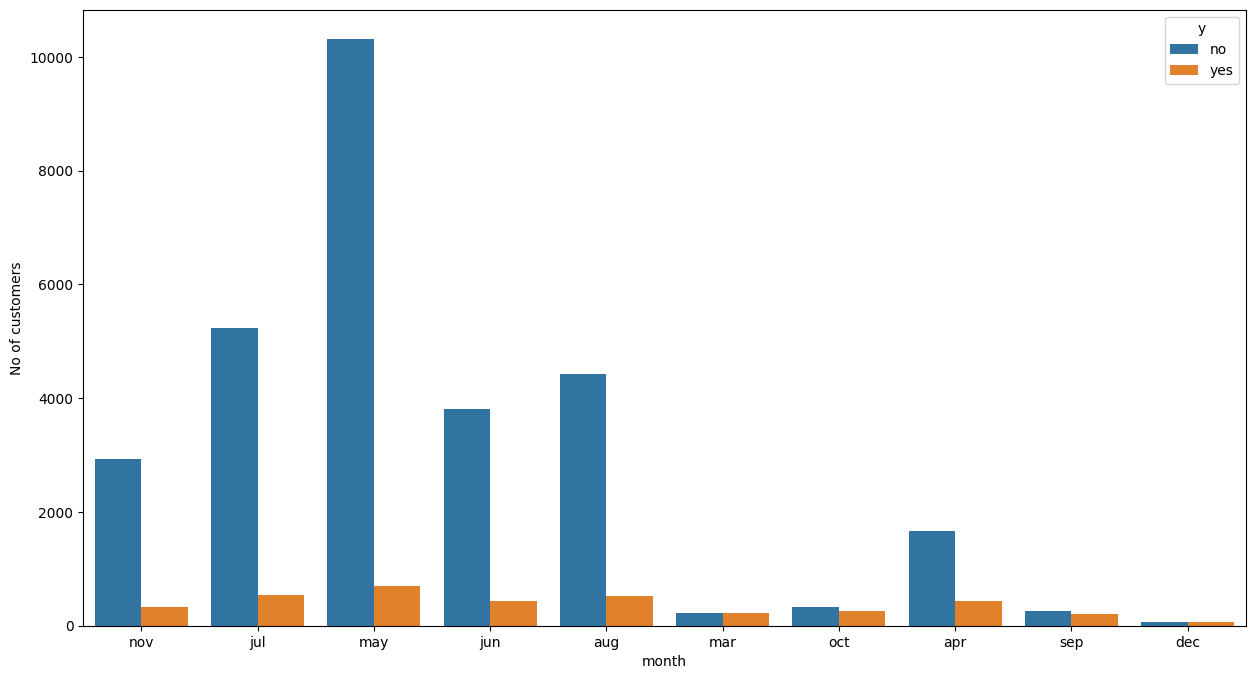

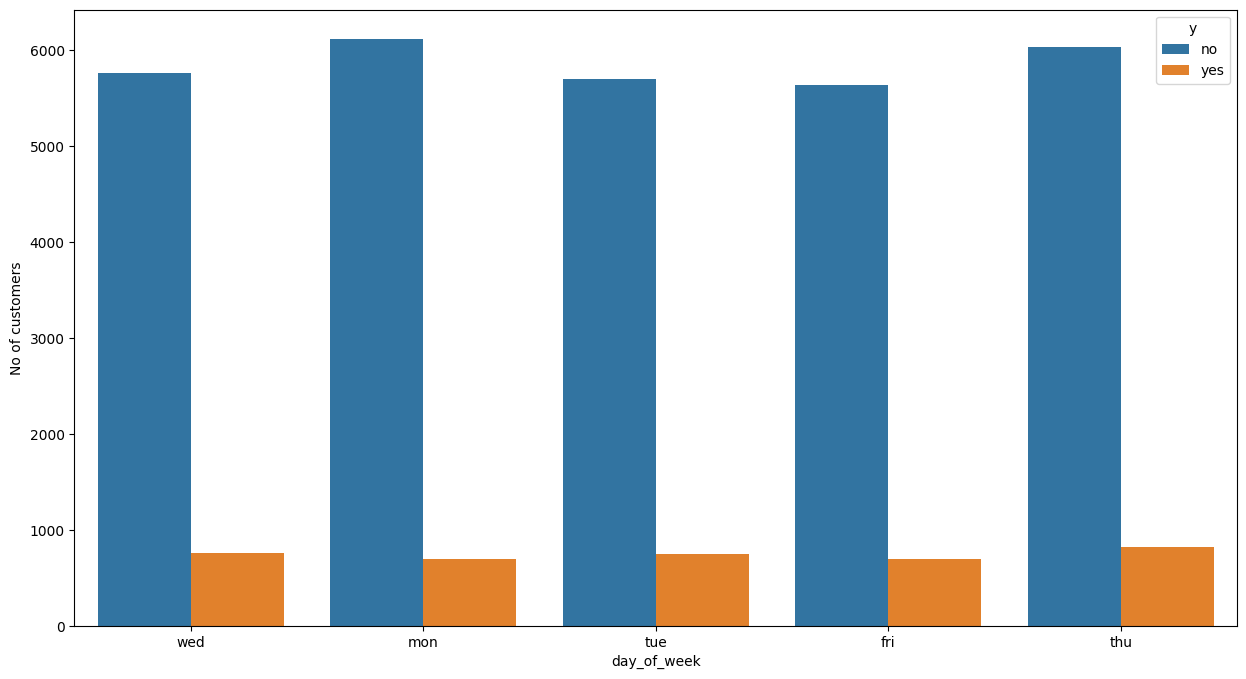

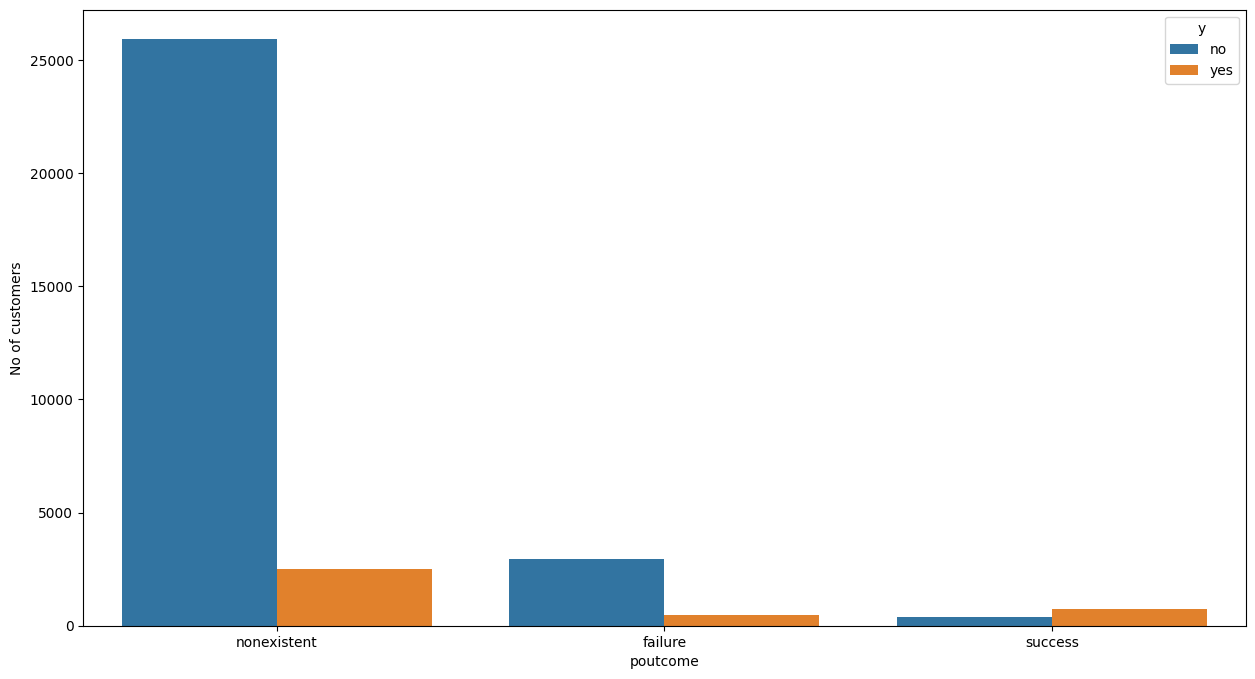

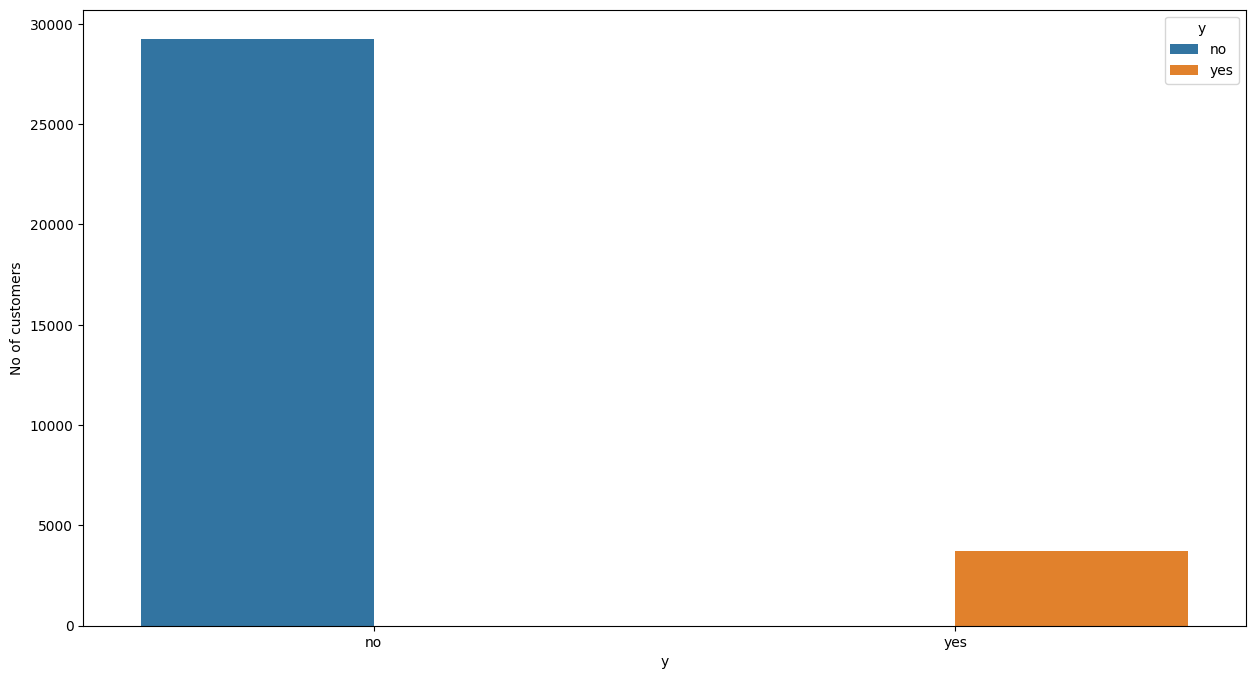

In [253]:
for col in data.select_dtypes(include=['object']).columns:
  #data[[col]].value_counts().plot(kind='bar',figsize=(10,8))
  plt.figure(figsize=(15,8))
  
  sns.countplot(x=data[col], hue=data["y"])
  plt.xlabel(col)
  plt.ylabel("No of customers")
  plt.show()


## Data visualization - numerical columns

<Axes: >

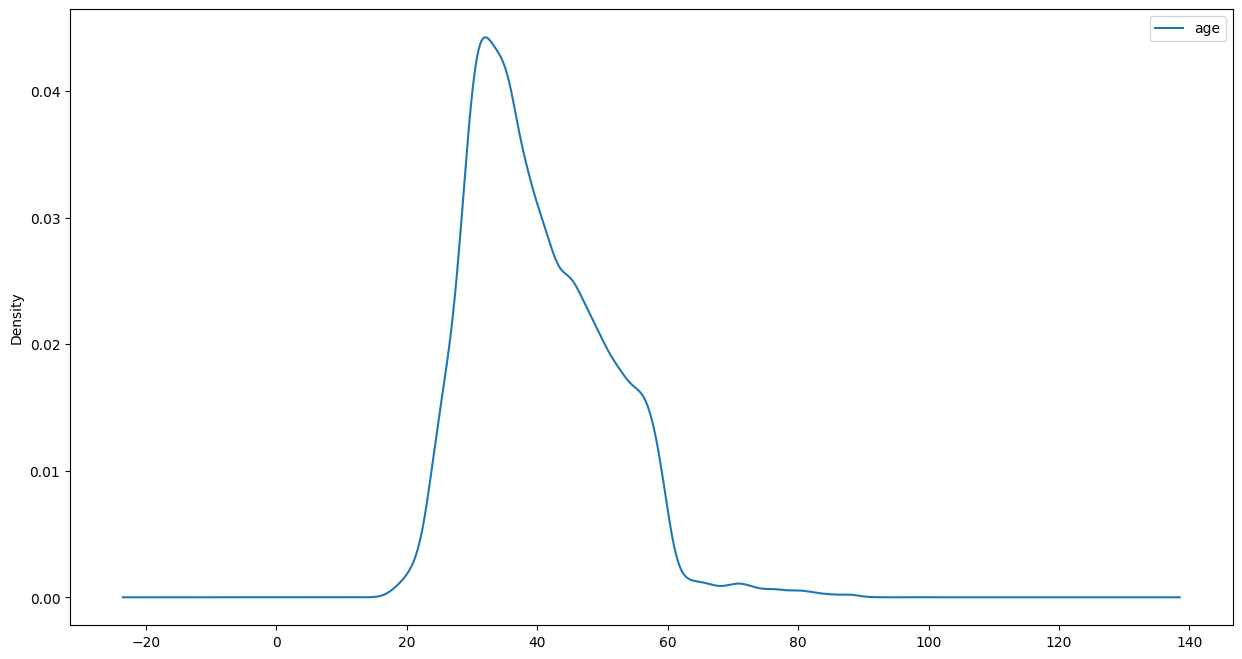

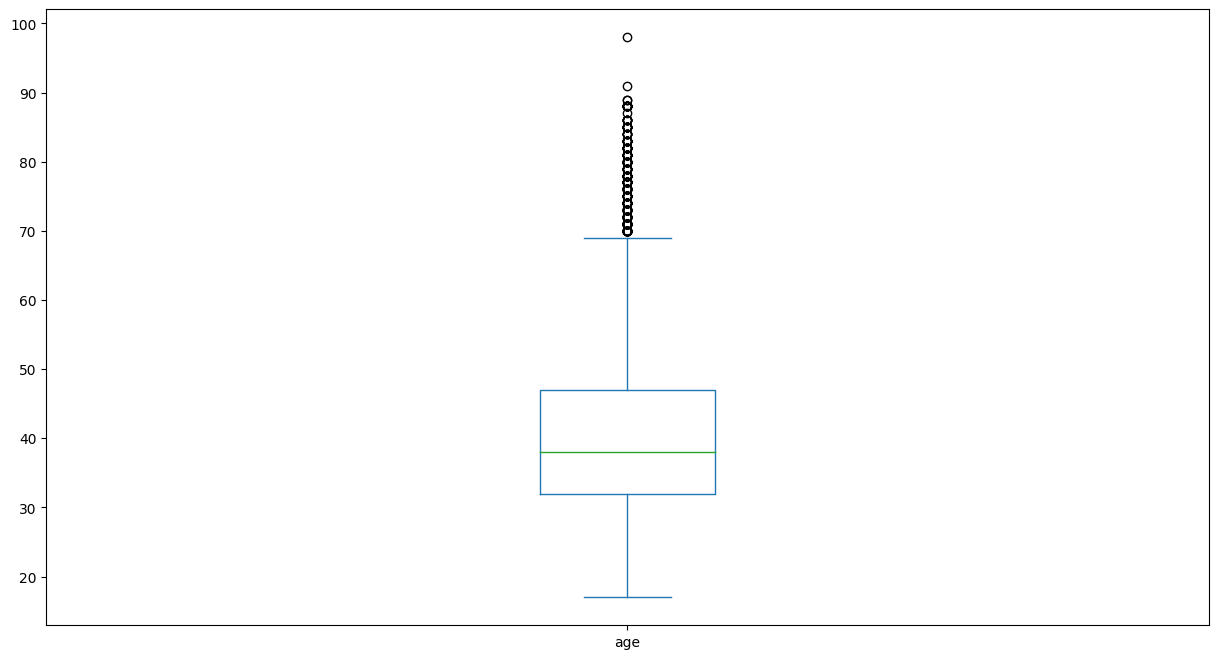

In [254]:
data[['age']].plot.kde(figsize=(15,8))
data[['age']].plot.box(figsize=(15,8))


<Axes: >

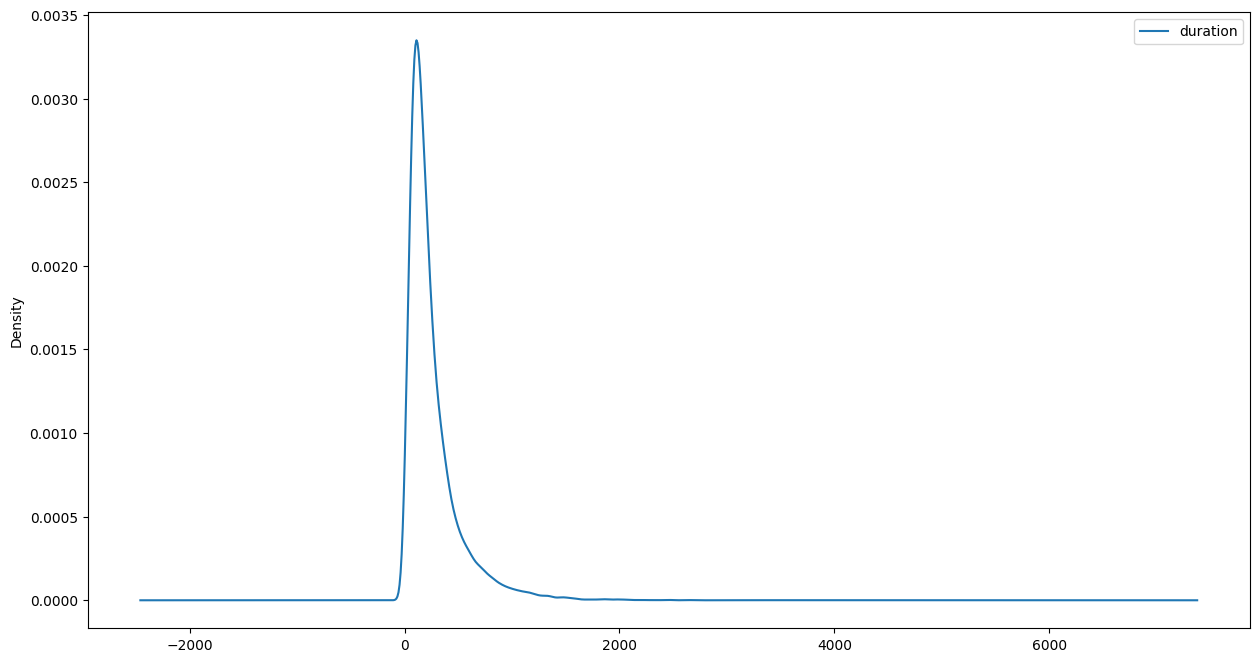

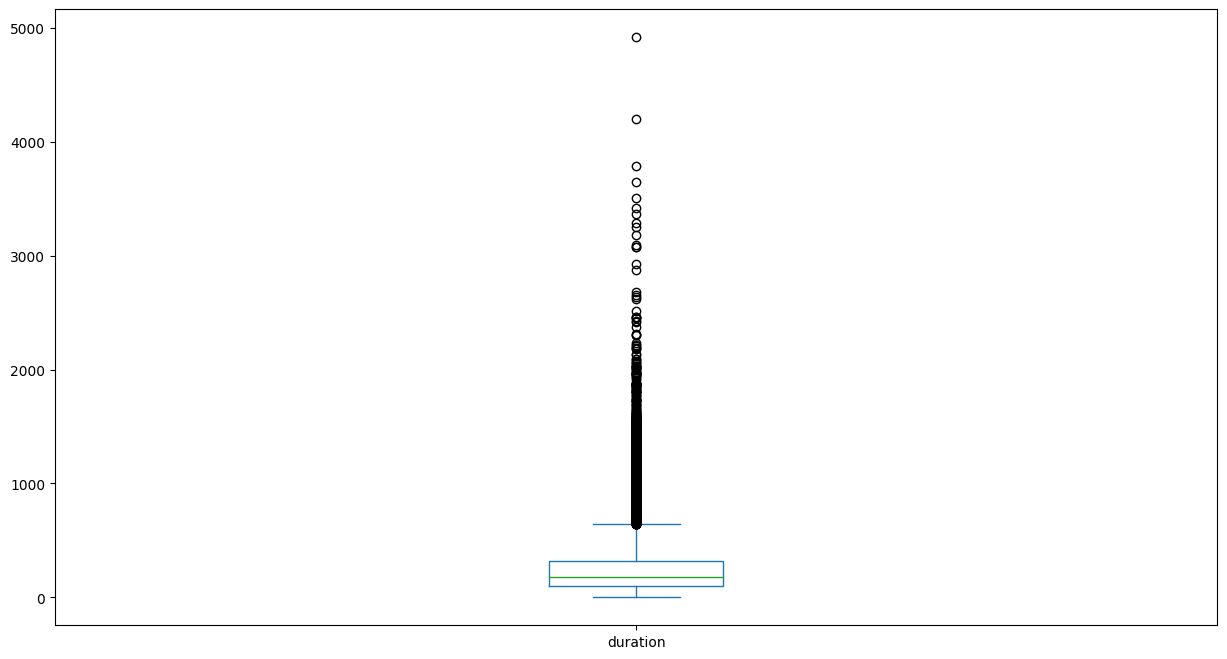

In [255]:
data[['duration']].plot.kde(figsize=(15,8))
data[['duration']].plot.box(figsize=(15,8))


<Axes: >

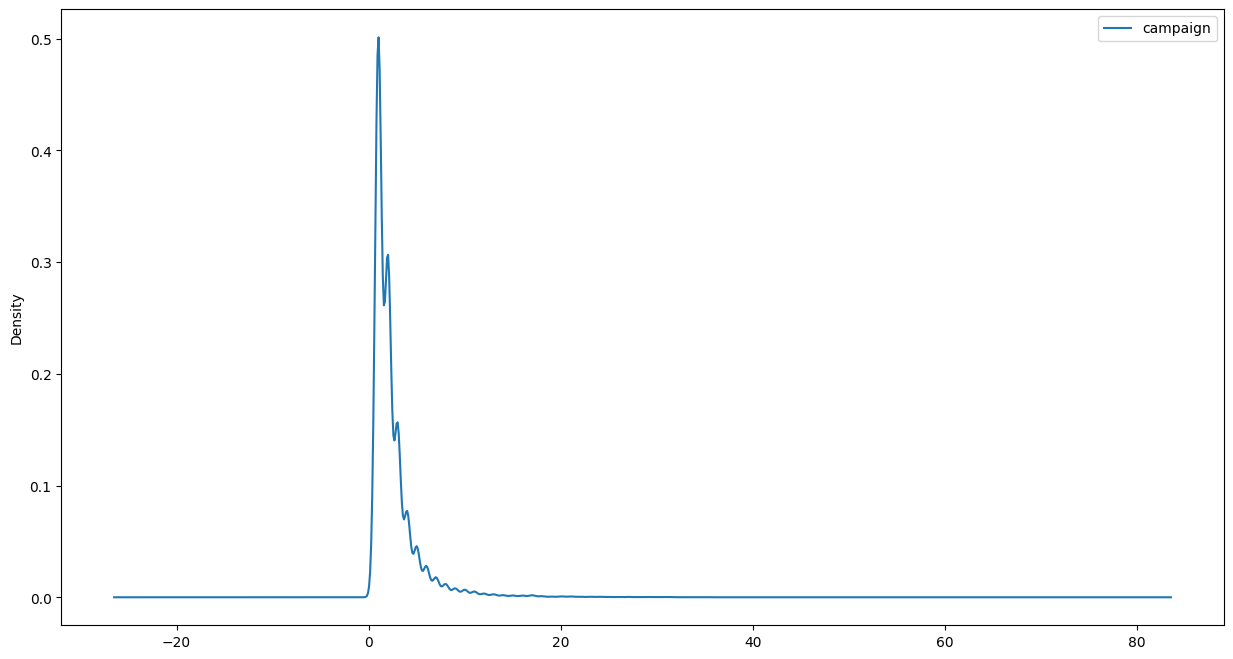

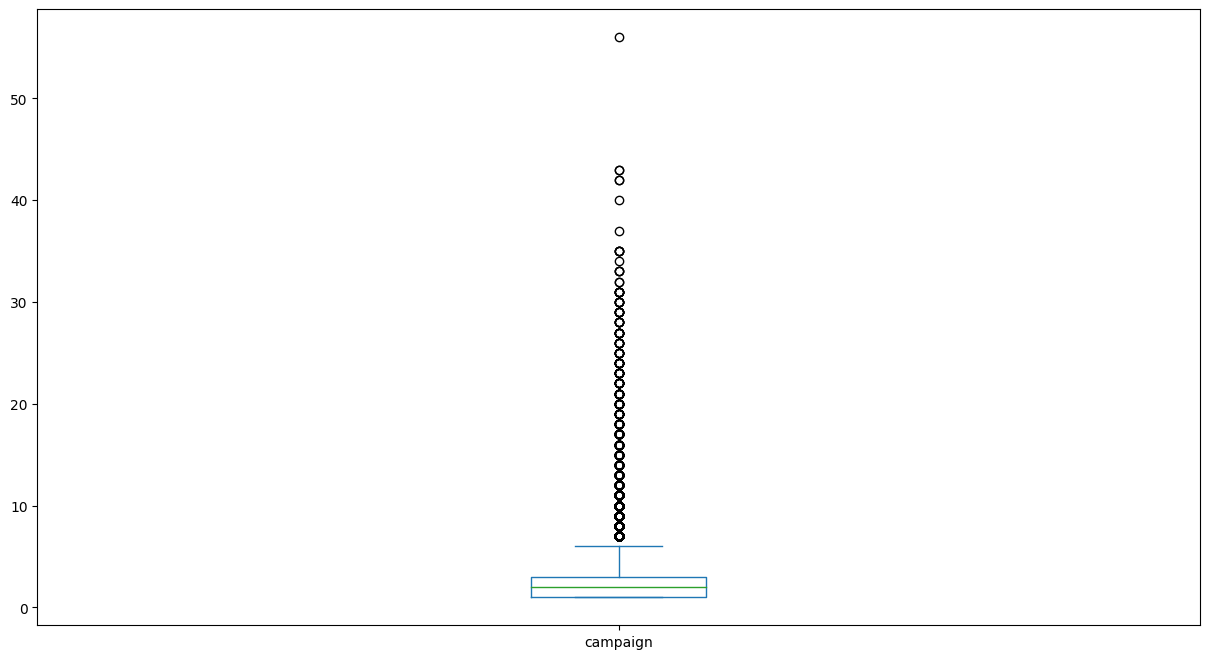

In [256]:
data[['campaign']].plot.kde(figsize=(15,8))
data[['campaign']].plot.box(figsize=(15,8))


<Axes: >

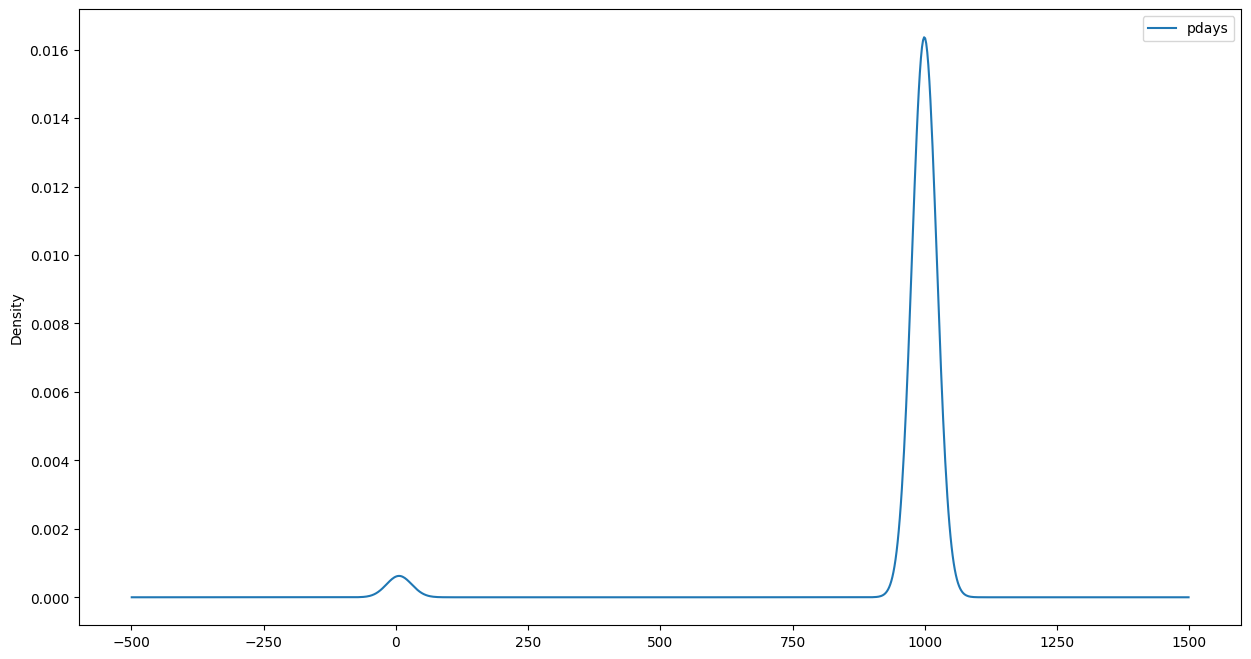

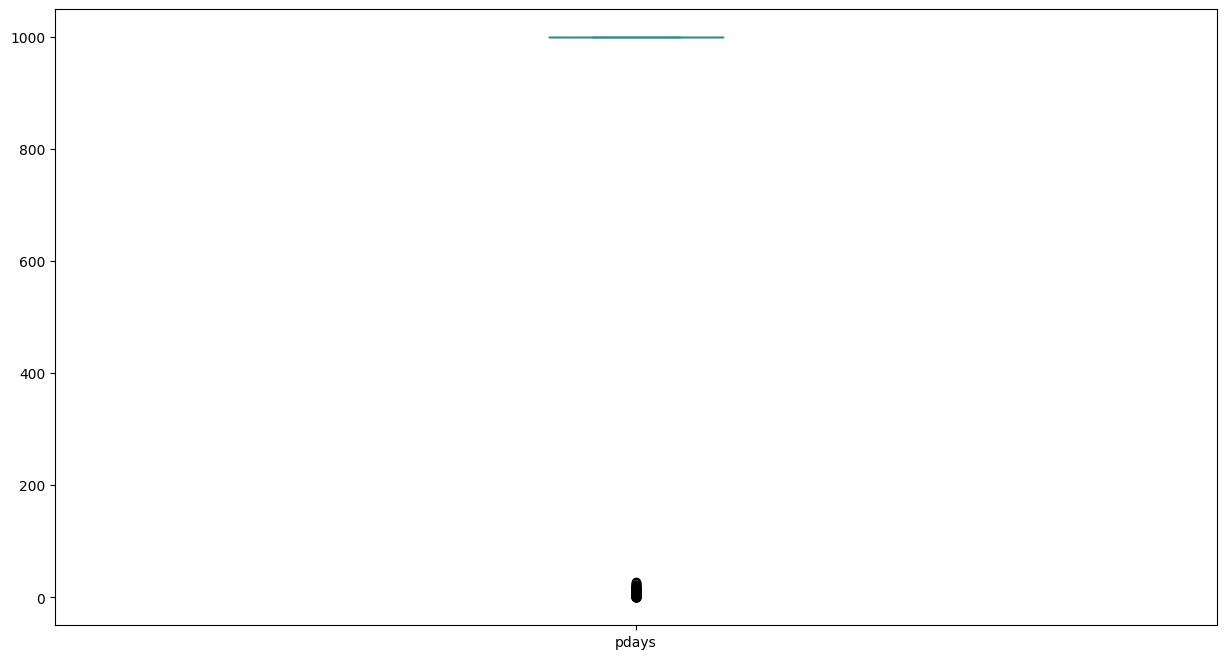

In [257]:
data[['pdays']].plot.kde(figsize=(15,8))
data[['pdays']].plot.box(figsize=(15,8))


<Axes: >

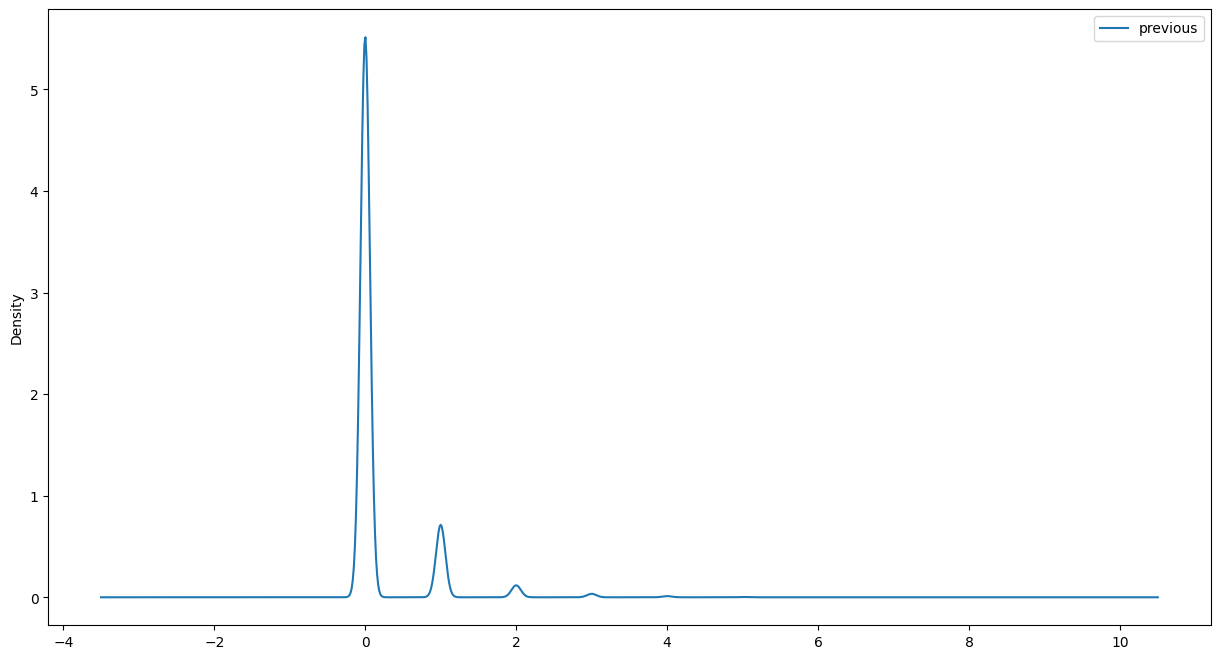

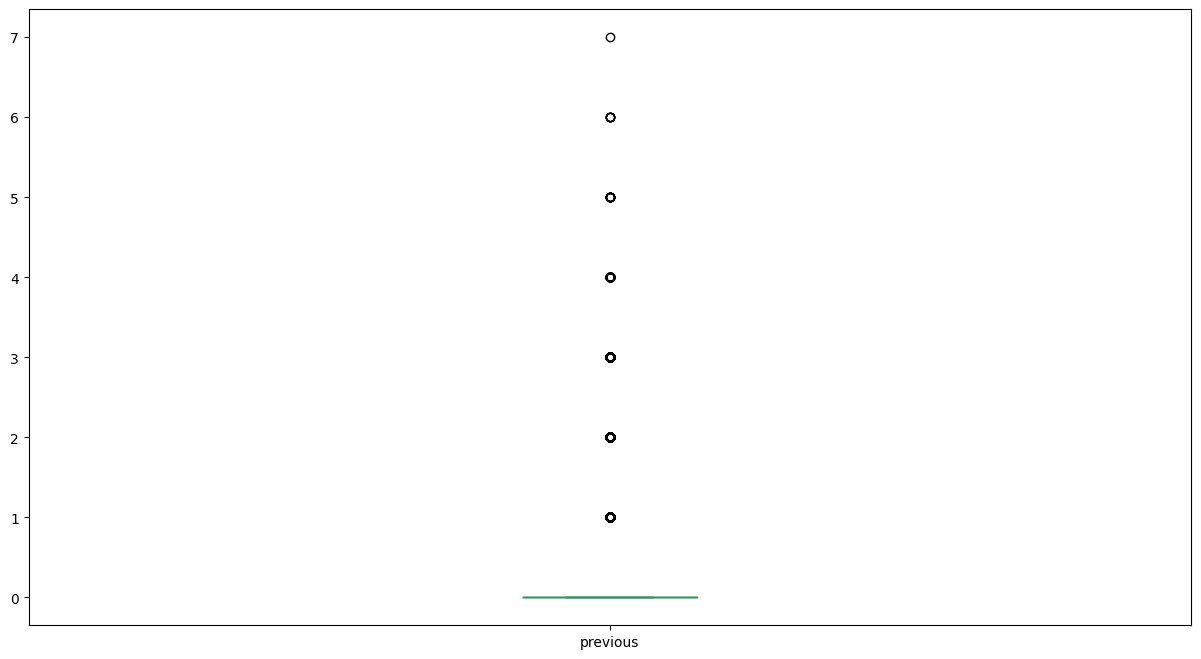

In [258]:
data[['previous']].plot.kde(figsize=(15,8))
data[['previous']].plot.box(figsize=(15,8))



*   Numerical columns contain outliers. Their distributions are skewed
*   **pdays** and **previous** concetrate mostly around one value, so it is most likely fine to leave them out



In [259]:
dropped_cols = data[['pdays','previous']]
data = data.drop(['pdays','previous'],axis=1)

In [260]:
data[['age','duration', 'campaign']].describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607
std,10.403636,258.975917,2.752326
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


## Handling outliers

Firstly let's double check the normality of numerical columns 

In [261]:
from scipy.stats import kstest
num_cols = ['age','duration', 'campaign']
df_data = zip(num_cols, [kstest(data[x], 'norm') for x in num_cols])
normality_df = pd.DataFrame(df_data).T
normality_df.rename(columns=normality_df.iloc[0], inplace = True)
normality_df.drop(normality_df.index[0], inplace = True)
normality_df

,age,duration,campaign
1,"(1.0, 0.0)","(0.9996648386215963, 0.0)","(0.8413447460685429, 0.0)"


p-values are less than 0.05, so the data cannot be assumed to be normal

I want to find out just how many outliers there are in each numerical column

In [262]:
data[num_cols].describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607
std,10.403636,258.975917,2.752326
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,98.000000,4918.000000,56.000000


In [263]:
outlier_df = pd.DataFrame(index = ['IQR', 'lower', 'upper', '%'])
outlier_df

""
IQR
lower
upper
%


In [264]:
for col in num_cols:
  IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
  lower_boundary = data[col].quantile(0.25) - 1.5 * IQR
  upper_boundary = data[col].quantile(0.75) + 1.5 * IQR
  perc = data[(data[col] > upper_boundary) | (data[col] < lower_boundary)][col].sum() / data.shape[0]
  ser = pd.Series([IQR, lower_boundary, upper_boundary, perc])
  ser.index = outlier_df.index
  outlier_df[col] = ser

In [265]:
outlier_df

,age,duration,campaign
IQR,15.000000,216.000000,2.000000
lower,9.500000,-221.000000,-2.000000
upper,69.500000,643.000000,6.000000
%,0.854841,69.374659,0.638422


In [266]:
data.y.value_counts()


no     29238
yes     3712
Name: y, dtype: int64

I will replace the outliers with the boundaries

In [267]:

data.loc[ data['age'] < outlier_df.iloc[1]['age'],'age' ] =  outlier_df.iloc[1]['age']
data.loc[ data['age'] > outlier_df.iloc[2]['age'],'age' ] =  outlier_df.iloc[2]['age']

data.loc[ data['duration'] > outlier_df.iloc[2]['duration'],  'duration'] =  outlier_df.iloc[2]['duration']

data.loc[ data['campaign'] > outlier_df.iloc[2]['campaign'],'campaign'  ] =  outlier_df.iloc[2]['campaign']


In [268]:
data.y.value_counts()


no     29238
yes     3712
Name: y, dtype: int64

In [269]:
data[num_cols].describe()

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,39.935478,234.923915,2.271077
std,10.134734,176.854558,1.546302
min,17.000000,0.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,69.500000,643.000000,6.000000


## Encoding

In [270]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
label = LabelEncoder()
onehot = OneHotEncoder()
ordinal = OrdinalEncoder()

In [271]:
cat_cols = list(data.select_dtypes(include=['object']).columns)
cat_cols.remove('y')


In [272]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

Encoding the target value to be either 0 or a 1 

In [273]:
data.y = label.fit_transform(data.y)
data.y.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [274]:
from sklearn.model_selection import train_test_split
from category_encoders.leave_one_out import LeaveOneOutEncoder

lou = LeaveOneOutEncoder(return_df=True,random_state=1)
y = data.y
X = data.drop('y',axis=1)
X = lou.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# Modeling

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc

In [279]:
lr = LogisticRegression(random_state=1)
svc = SVC(random_state=1)
rfc = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(random_state=1)
models = [lr,svc,rfc,xgb]

In [278]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
22299,37.0,0.128714,0.101243,0.107307,0.052025,0.115574,0.112717,0.052986,0.063488,0.115597,260,3,0.088017
7892,37.0,0.086281,0.101243,0.138161,0.052025,0.115574,0.112717,0.052986,0.101685,0.102481,17,1,0.144107
9252,47.0,0.145546,0.101243,0.107307,0.052025,0.109269,0.112717,0.147032,0.101685,0.115597,101,1,0.088017
31407,39.0,0.069220,0.101243,0.112861,0.128855,0.115574,0.112717,0.147032,0.092329,0.120041,55,6,0.088017
30635,38.0,0.108353,0.101243,0.112861,0.128855,0.109269,0.112717,0.147032,0.063488,0.116095,37,1,0.088017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,59.0,0.079499,0.101243,0.107307,0.128855,0.115574,0.112717,0.147032,0.092329,0.120041,300,1,0.088017
7813,34.0,0.114761,0.101243,0.138161,0.128855,0.115574,0.112717,0.147032,0.101685,0.115597,54,1,0.088017
32511,31.0,0.069086,0.101193,0.076269,0.128816,0.115516,0.112680,0.146984,0.092156,0.115444,643,1,0.087982
5192,37.0,0.108168,0.141422,0.112622,0.128816,0.115516,0.112680,0.146984,0.101378,0.115444,224,1,0.087982


In [285]:
metrics_df = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
for model in models:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  col = pd.Series(data=[accuracy_score(pred, y_test), precision_score(pred, y_test), recall_score(pred, y_test),f1_score(pred, y_test)],
                  index= ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                  name=type(model).__name__)
  metrics_df[type(model).__name__] = col

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy     0.899369
Precision    0.259809
Recall       0.651596
F1-Score     0.371494
Name: LogisticRegression, dtype: float64


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy     0.88553
Precision    0.00000
Recall       0.00000
F1-Score     0.00000
Name: SVC, dtype: float64
Accuracy     1.0
Precision    1.0
Recall       1.0
F1-Score     1.0
Name: RandomForestClassifier, dtype: float64
Accuracy     1.0
Precision    1.0
Recall       1.0
F1-Score     1.0
Name: XGBClassifier, dtype: float64


In [286]:
metrics_df

,LogisticRegression,SVC,RandomForestClassifier,XGBClassifier
Accuracy,0.899369,0.88553,1.0,1.0
Precision,0.259809,0.00000,1.0,1.0
Recall,0.651596,0.00000,1.0,1.0
F1-Score,0.371494,0.00000,1.0,1.0


# Metrics

Text(33.22222222222222, 0.5, 'Predicted Values')

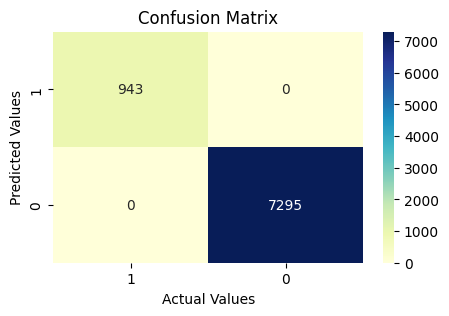

In [288]:
tn, fp , fn, tp = confusion_matrix(y_test,rfc.predict(X_test)).ravel()

plt.figure(figsize = (5,3)) 

sns.heatmap(np.array([tp, fp , fn, tn]).reshape(2,2),xticklabels = [1,0],
            yticklabels = [1,0],fmt='d', annot = True,cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
